### Importy

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import shap
from scripts.train_utilities import *
from scripts.essentials import *
from scripts.plots import *

In [3]:
tf.compat.v1.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [4]:
train_set = pd.read_csv('train_set_full.csv')
test_set = pd.read_csv('test_set_full.csv')
val_set = pd.read_csv('val_set_full.csv')

In [5]:
prefix = "NFLX"

### Zmienne

Newsy

In [7]:
train_set.columns

Index(['future', 'influential', 'trustworthy', 'not clickbait',
       'finbert_Score', 'bart_Score', 'vader_Score', 'future_finbert',
       'future_bart', 'future_vader', 'influential_finbert',
       'influential_bart', 'influential_vader', 'trustworthy_finbert',
       'trustworthy_bart', 'trustworthy_vader', 'clickbait_finbert',
       'clickbait_bart', 'clickbait_vader', 'Date', '^GSPC_Close',
       'EURUSD=X_Close', 'TSLA_Open', 'TSLA_High', 'TSLA_Low', 'TSLA_Close',
       'mean_future', 'mean_influential', 'mean_trustworthy', 'mean_clickbait',
       'norm_rsi_14', 'norm_rsi_gspc_14', 'norm_slowk_14', 'vwap_14',
       'norm_roc_14', 'log_return_1', 'log_return_5', 'log_return_10',
       'log_return_20', 'log_return_gspc_1', 'log_return_gspc_5',
       'log_return_gspc_10', 'log_return_gspc_20', 'target_1', 'target_5',
       'target_10', 'target_20', 'minmax_^GSPC_Volume', 'minmax_TSLA_Volume',
       'minmax_daily_variation', 'minmax_high_close_pressure',
       'minmax_lo

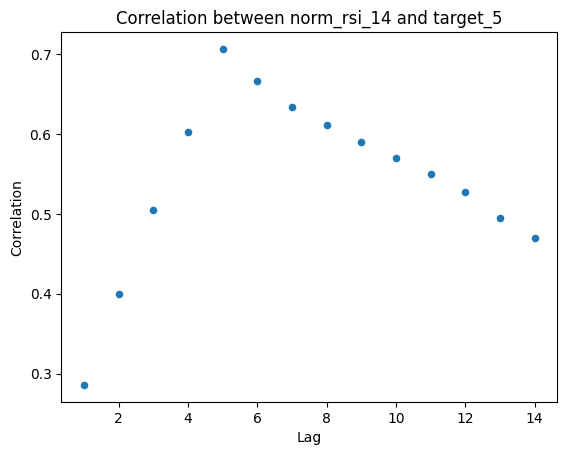

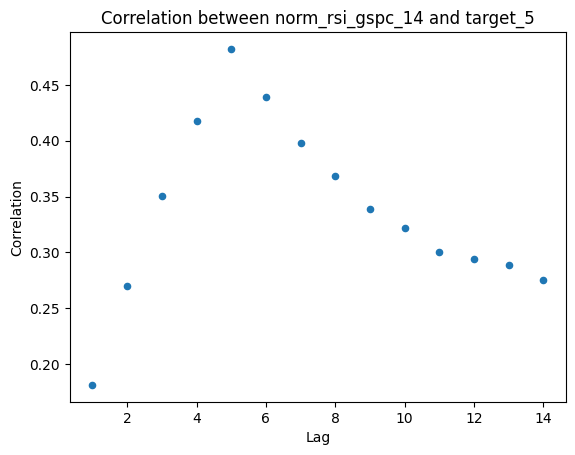

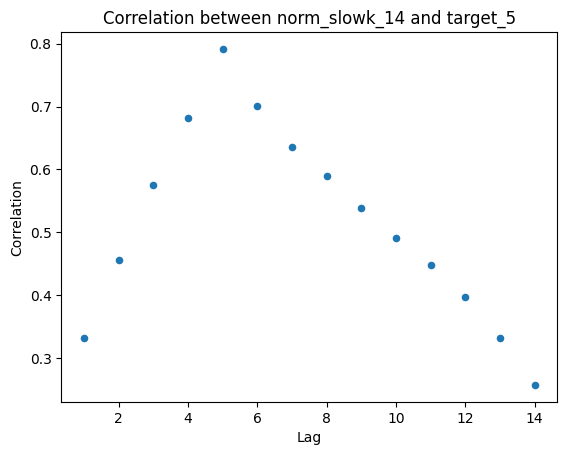

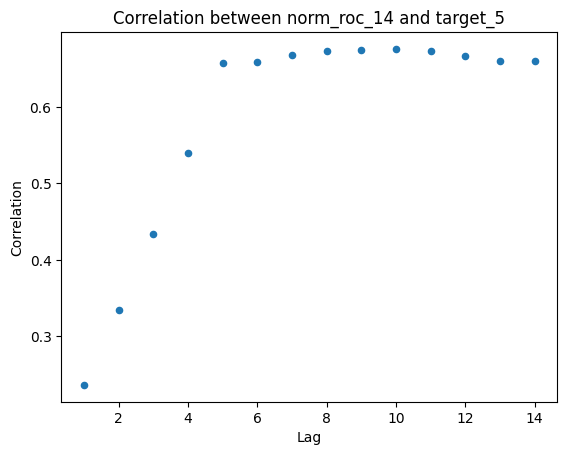

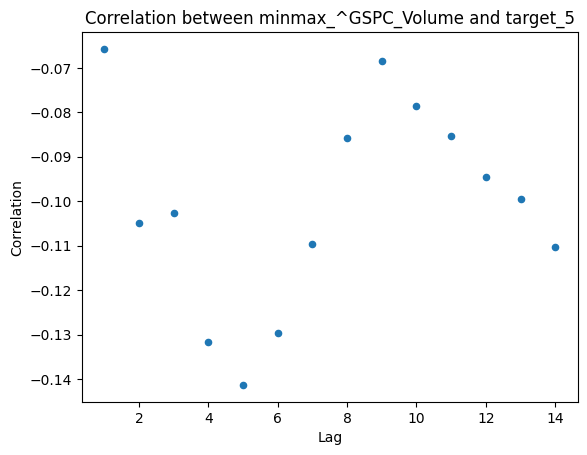

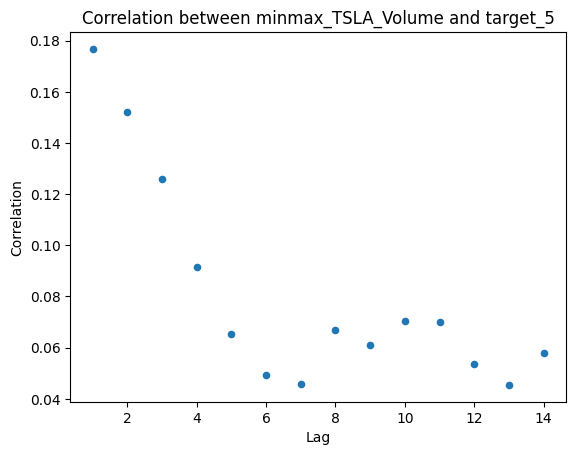

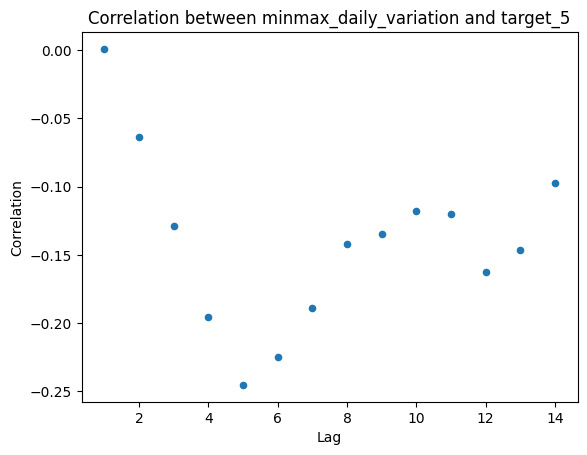

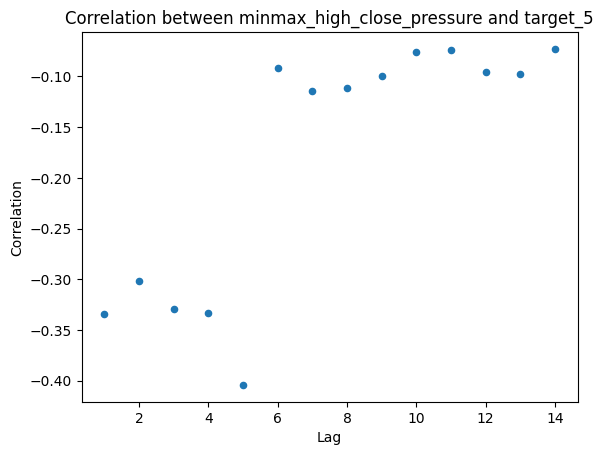

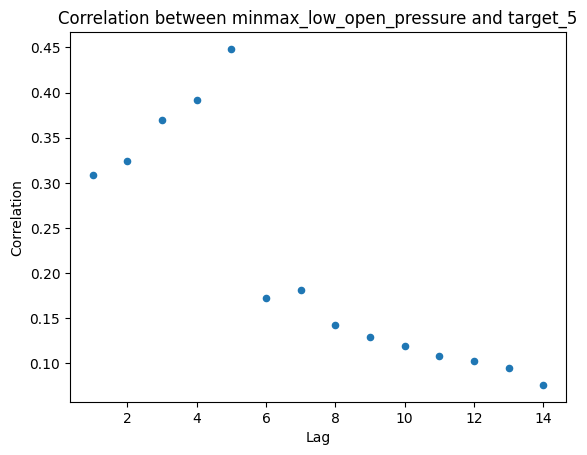

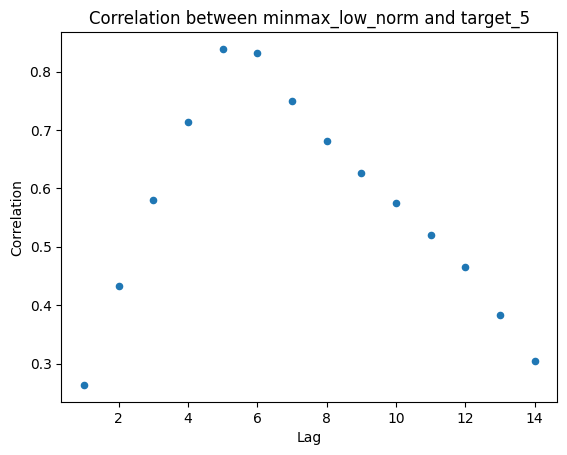

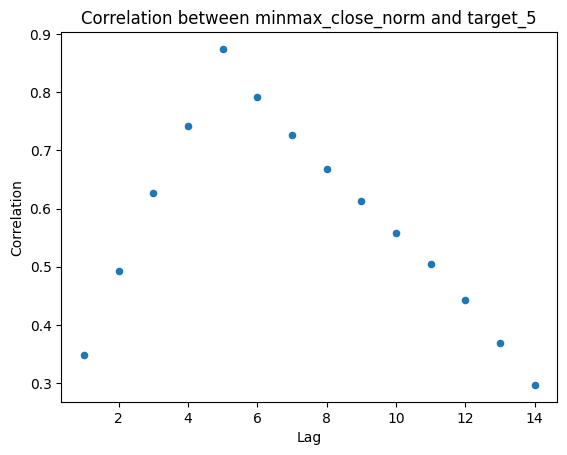

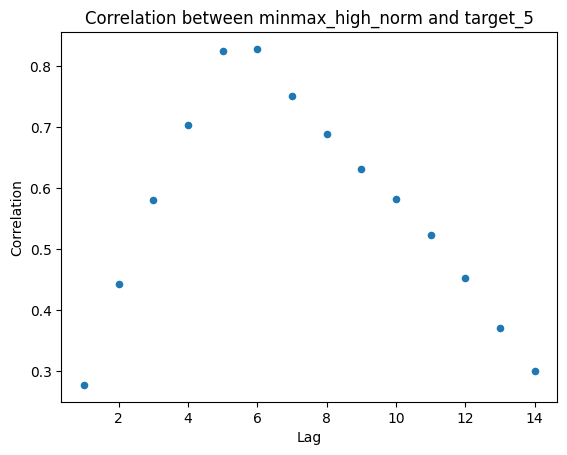

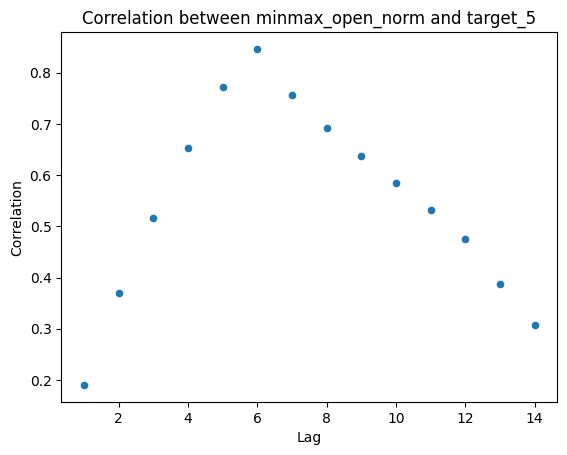

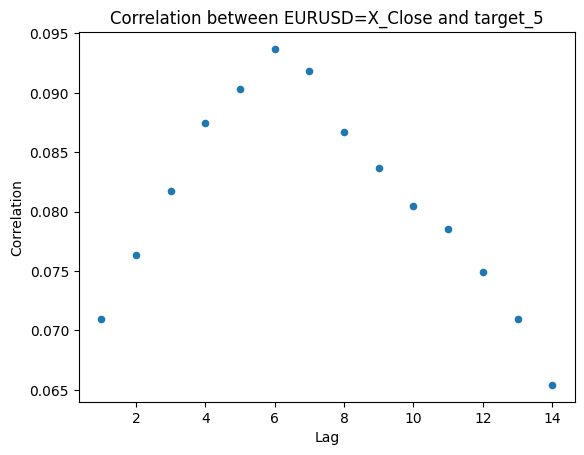

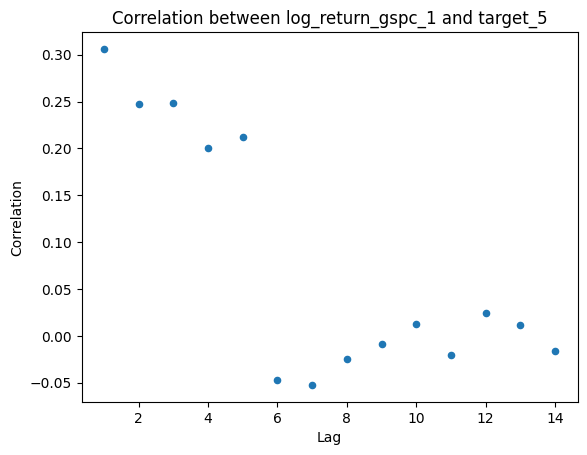

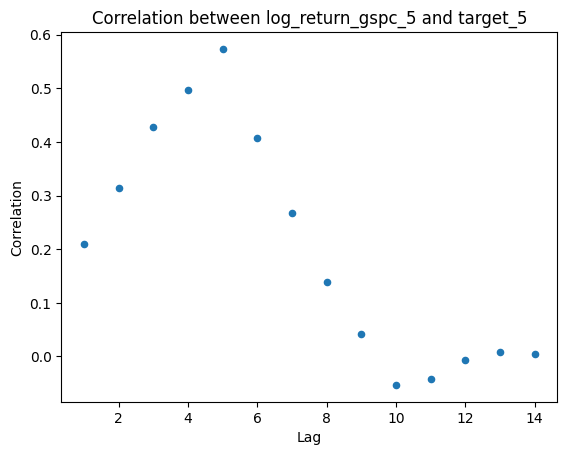

In [9]:
plot_lagged_correlations(train_set[['norm_rsi_14', 'norm_rsi_gspc_14', 'norm_slowk_14', 'norm_roc_14',
        'minmax_^GSPC_Volume', 'minmax_TSLA_Volume', 'minmax_daily_variation',
       'minmax_high_close_pressure', 'minmax_low_open_pressure',
       'minmax_low_norm', 'minmax_close_norm', 'minmax_high_norm',
       'minmax_open_norm', 'EURUSD=X_Close', 'log_return_gspc_1' ,'log_return_gspc_5','target_5']], 'target_5')

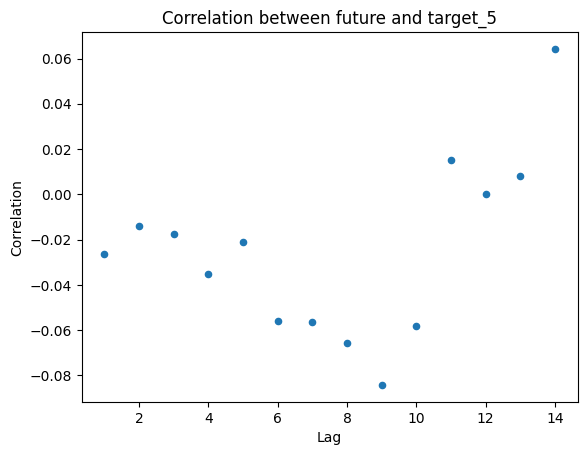

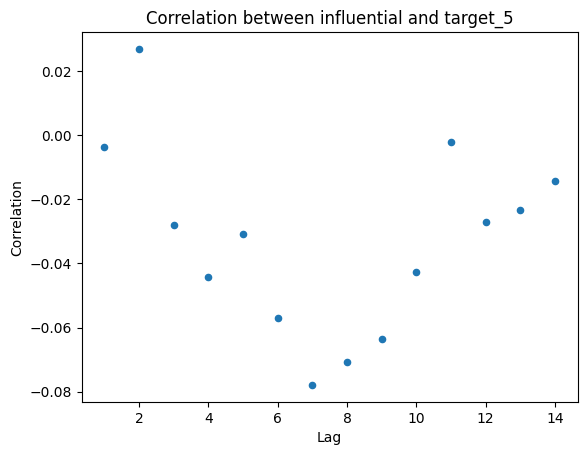

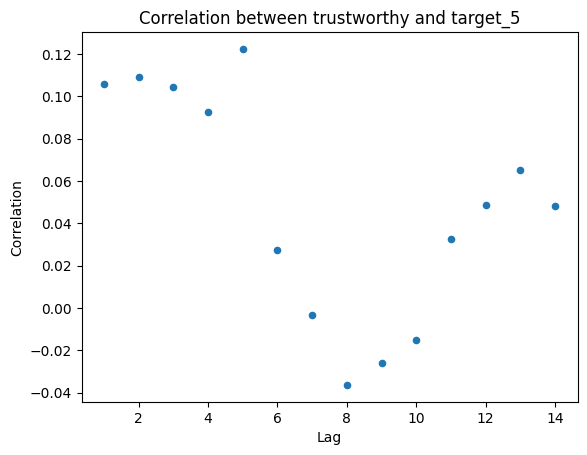

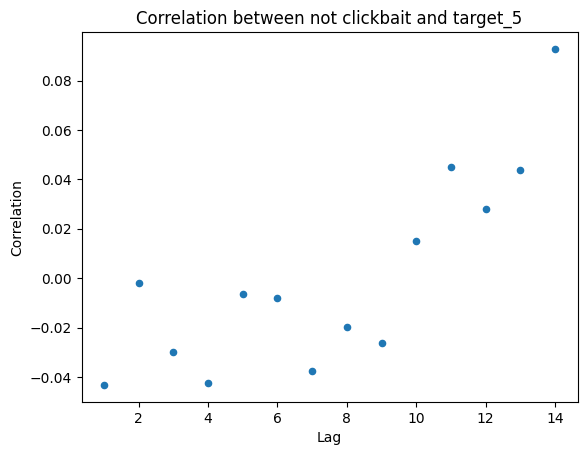

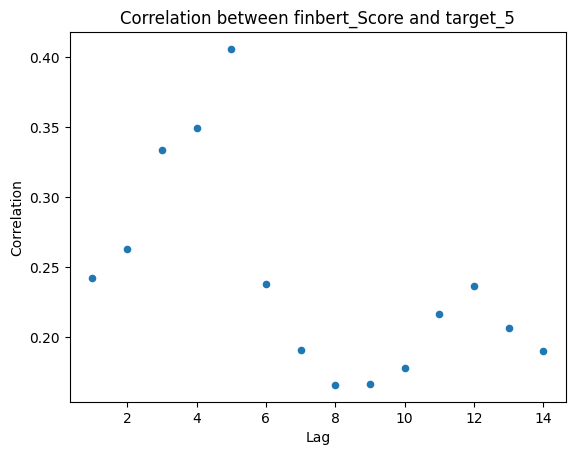

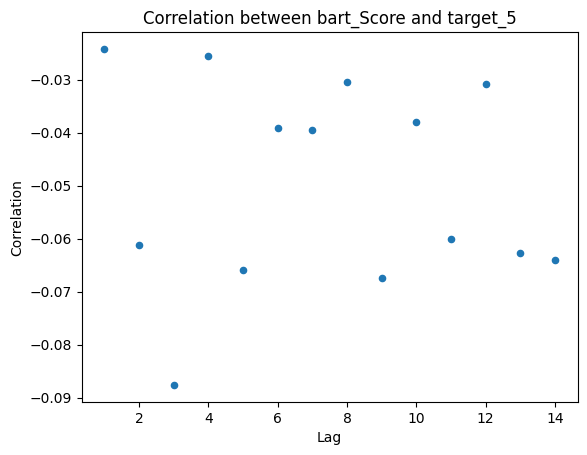

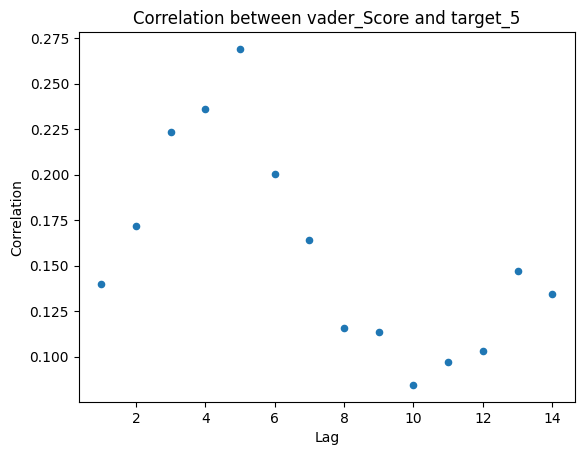

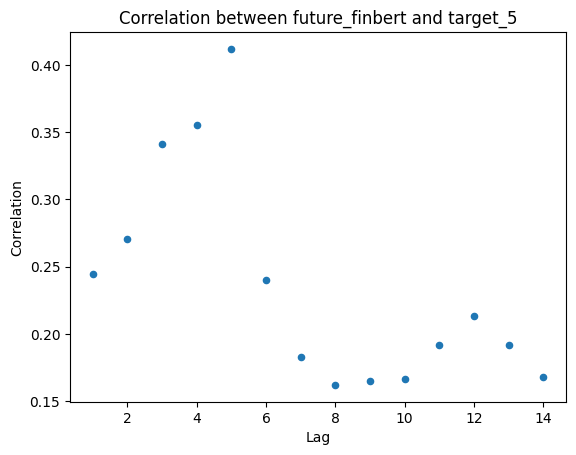

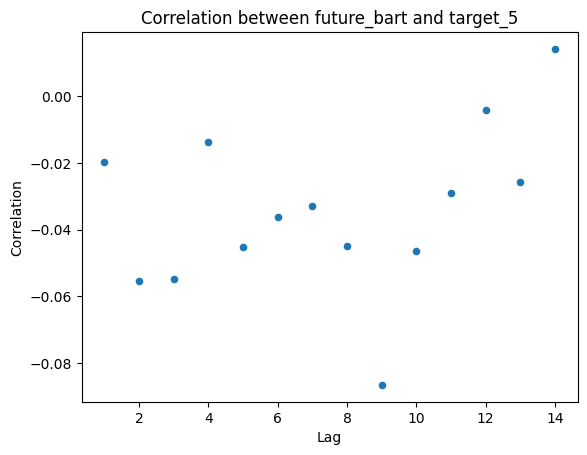

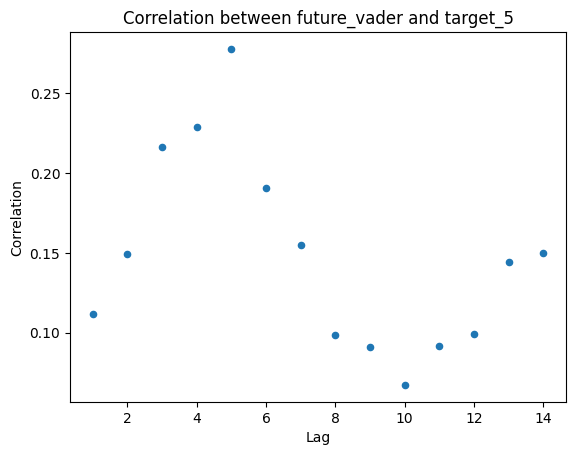

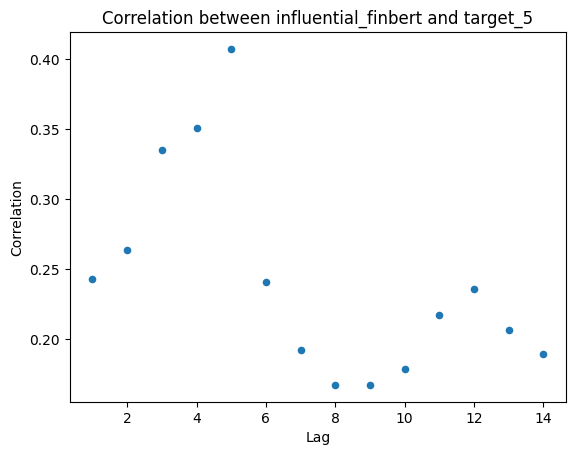

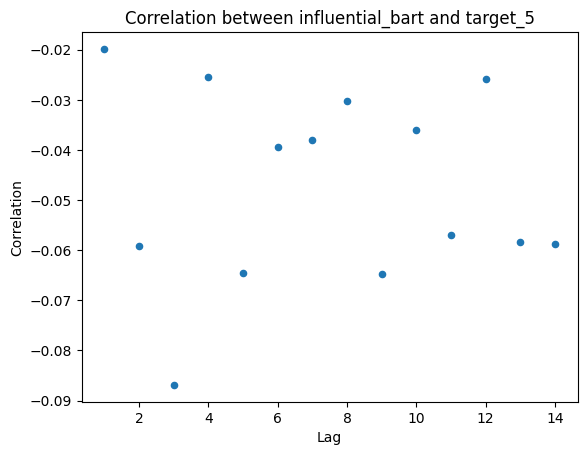

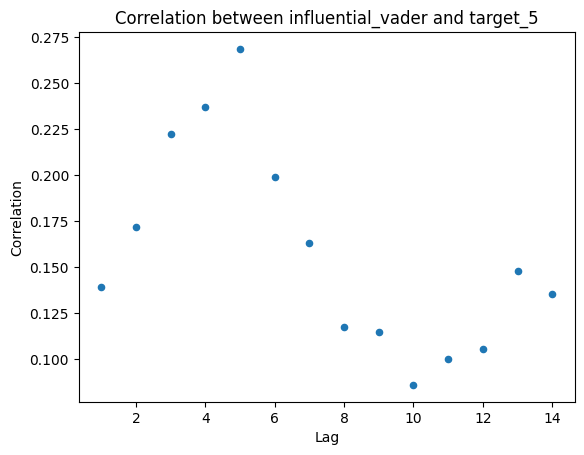

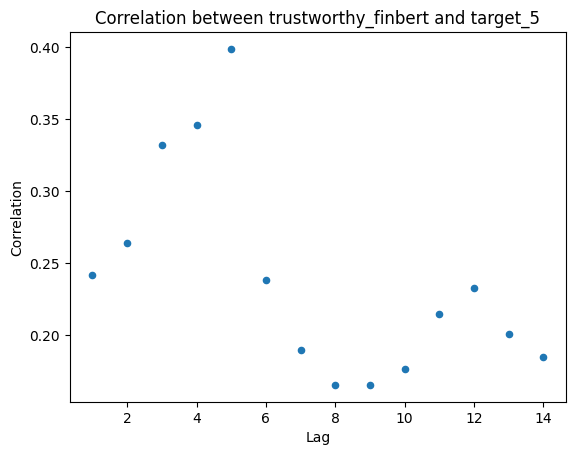

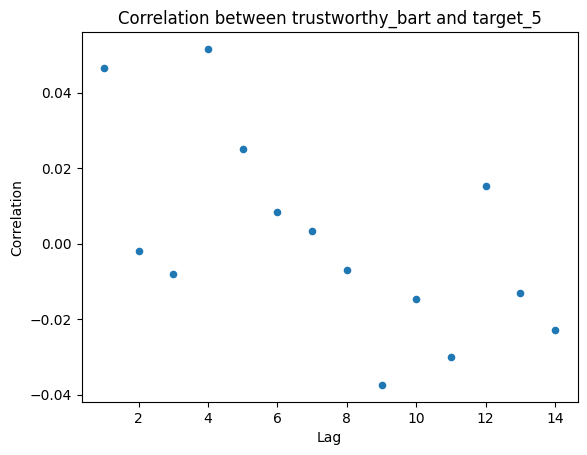

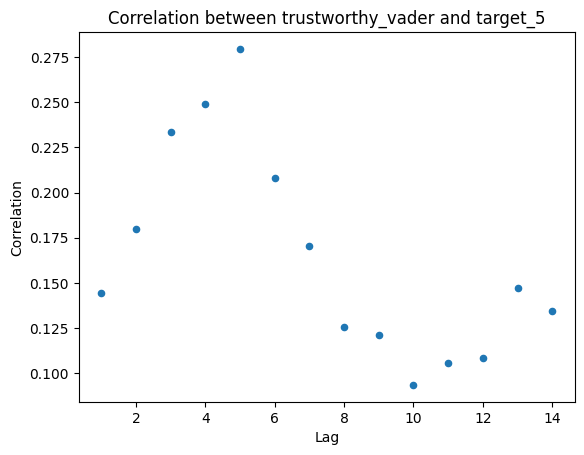

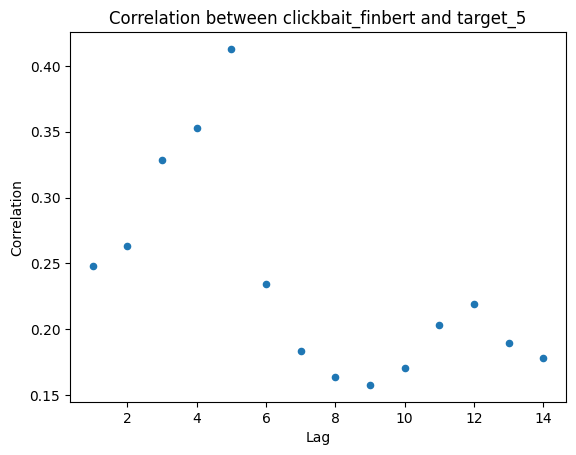

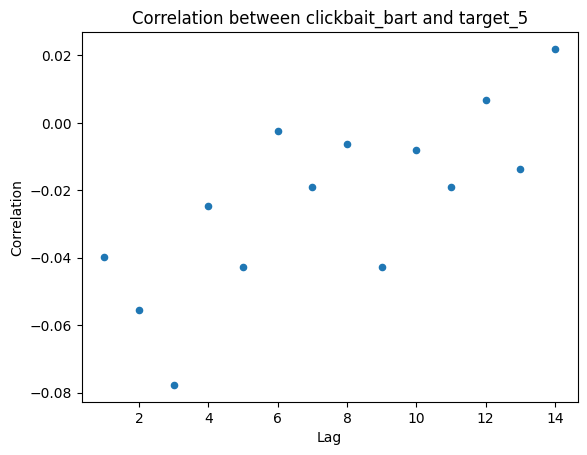

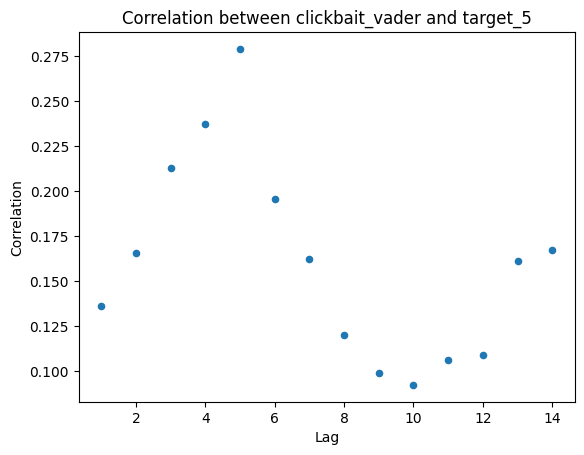

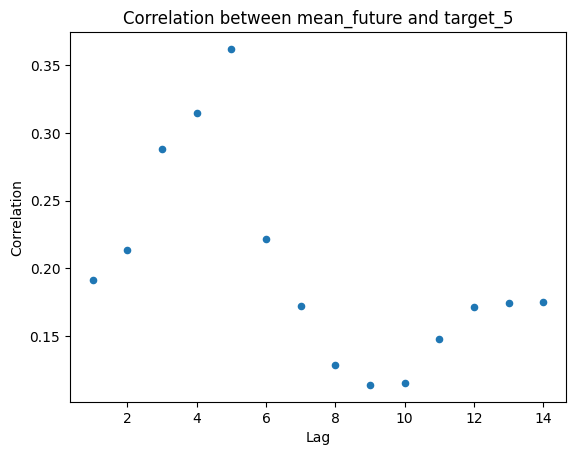

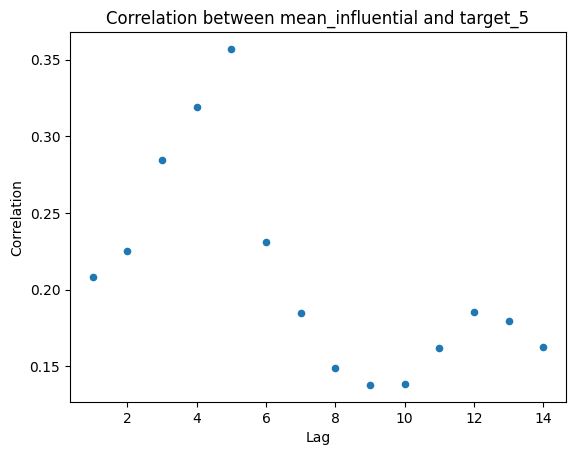

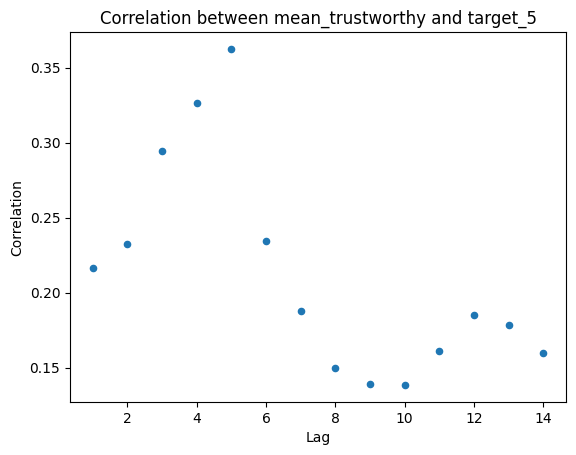

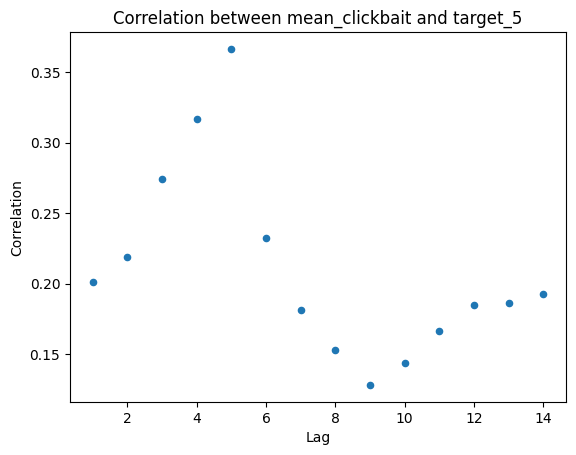

In [10]:
plot_lagged_correlations(train_set[['future', 'influential', 'trustworthy', 'not clickbait',
       'finbert_Score', 'bart_Score', 'vader_Score', 'future_finbert',
       'future_bart', 'future_vader', 'influential_finbert',
       'influential_bart', 'influential_vader', 'trustworthy_finbert',
       'trustworthy_bart', 'trustworthy_vader', 'clickbait_finbert',
       'clickbait_bart', 'clickbait_vader','mean_future', 'mean_influential', 'mean_trustworthy', 'mean_clickbait','target_5']], 'target_5')

### Shap dla prostych LSTM - szukanie globalnej wagi kolumn

In [13]:
cols = ['finbert_Score', 'bart_Score', 'vader_Score',
        'mean_future', 'mean_influential', 'mean_trustworthy', 'mean_clickbait',
        'norm_rsi_14', 'norm_rsi_gspc_14',
        'norm_slowk_14', 'norm_roc_14',
        'minmax_TSLA_Volume','log_return_5','log_return_1','EURUSD=X_Close',
        'minmax_daily_variation', 'minmax_high_close_pressure',
        'minmax_low_open_pressure',
        'minmax_low_norm', 'minmax_close_norm',
        'minmax_high_norm', 'minmax_open_norm']

u = create_unique_subsets(cols, subset_size=5, min_diff=3)

In [32]:
shift_ = 5
window_size = 10
target_cols = ['target_5']
y_base_val = val_set[target_cols[0]].shift(shift_)[window_size:].values
y_base_train = train_set[target_cols[0]].shift(shift_)[window_size:].values
y_base0_val = [0 for i in range((val_set.shape[0]-window_size))]
y_base0_train = [0 for i in range((train_set.shape[0]-window_size))]

In [14]:
len(u)

97

In [ ]:
df = run_multiple_models(train_set,val_set,u,n_epochs=200)

In [18]:
top_10_df = df.nsmallest(10, 'mse_val')

In [27]:
top_10_df

,cols_used,mse_val,mse_train,aggregated_shap
54,"(vader_Score, mean_influential, log_return_5, ...",0.001348,0.003168,"[[0.004031251334911409, 0.004526544958415718, ..."
52,"(vader_Score, mean_influential, norm_rsi_gspc_...",0.001489,0.001411,"[[0.008397904424206633, 0.005843692649321732, ..."
38,"(bart_Score, mean_influential, norm_rsi_gspc_1...",0.001606,0.002947,"[[0.006727258336017744, 0.002542455448039223, ..."
30,"(bart_Score, mean_future, mean_trustworthy, no...",0.001708,0.003644,"[[0.004091949183683453, 0.0018928854348674363,..."
46,"(vader_Score, mean_future, mean_trustworthy, m...",0.001712,0.003486,"[[0.008391335134828882, 0.0013330321886239587,..."
43,"(bart_Score, norm_rsi_14, norm_rsi_gspc_14, mi...",0.001730,0.002379,"[[0.006434137971687184, 0.007994761859463897, ..."
15,"(finbert_Score, mean_future, minmax_close_norm...",0.001740,0.004090,"[[0.004856727152026421, 0.001337447620991547, ..."
9,"(finbert_Score, vader_Score, EURUSD=X_Close, m...",0.001763,0.002819,"[[0.006384581729319274, 0.0018287888079212685,..."
20,"(finbert_Score, mean_influential, log_return_1...",0.001768,0.003896,"[[0.004122314920484682, 0.003763385506139373, ..."
7,"(finbert_Score, vader_Score, mean_clickbait, n...",0.001799,0.002781,"[[0.005147796058665663, 0.004409277728267204, ..."


In [19]:
# Agregacja SHAP dla najlepszych modeli jako średnia z okien czasowych
column_importance_sum_count = {}

for index, row in top_10_df.iterrows():
    shap_values = row['aggregated_shap']
    cols = row['cols_used']
    mean_shap = np.mean(shap_values, axis=0)

    for col, value in zip(cols, mean_shap):
        if col in column_importance_sum_count:
            column_importance_sum_count[col]['sum'] += value
            column_importance_sum_count[col]['count'] += 1
        else:
            column_importance_sum_count[col] = {'sum': value, 'count': 1}

column_importance_mean = {col: (val['sum'] / val['count'] , val['count']) for col, val in column_importance_sum_count.items()}

sorted_column_importance_mean = dict(sorted(column_importance_mean.items(), key=lambda item: item[1], reverse=True))

sorted_column_importance_mean

{'minmax_low_norm': (0.006748840583526513, 2),
 'vader_Score': (0.005726545694933035, 5),
 'norm_slowk_14': (0.005469920902962839, 1),
 'minmax_high_norm': (0.005451560481232266, 5),
 'minmax_open_norm': (0.004840137392612437, 2),
 'bart_Score': (0.004760360544040262, 3),
 'mean_influential': (0.0038418355460973427, 4),
 'norm_rsi_14': (0.0038388050751332415, 1),
 'finbert_Score': (0.0038371320626133924, 4),
 'norm_roc_14': (0.00380219377866869, 2),
 'log_return_1': (0.003136799395983792, 1),
 'minmax_daily_variation': (0.0029211181466882786, 1),
 'norm_rsi_gspc_14': (0.0028985340337663833, 4),
 'mean_trustworthy': (0.0028940985839511543, 2),
 'mean_clickbait': (0.0026709106019959183, 2),
 'minmax_high_close_pressure': (0.0026141914935348, 1),
 'log_return_5': (0.002533244081464744, 3),
 'minmax_low_open_pressure': (0.0023176156648849746, 1),
 'mean_future': (0.0012454814737191784, 3),
 'minmax_close_norm': (0.001228197518418854, 1),
 'EURUSD=X_Close': (0.0008000096754748384, 2)}

In [20]:
# Agregacja SHAP dla najlepszych modeli jako max z okien czasowych
column_importance_sum_count = {}

for index, row in top_10_df.iterrows():
    shap_values = row['aggregated_shap']
    cols = row['cols_used']
    mean_shap = np.max(shap_values, axis=0)

    for col, value in zip(cols, mean_shap):
        if col in column_importance_sum_count:
            column_importance_sum_count[col]['sum'] += value
            column_importance_sum_count[col]['count'] += 1
        else:
            column_importance_sum_count[col] = {'sum': value, 'count': 1}

column_importance_mean = {col: (val['sum'] / val['count'] , val['count']) for col, val in column_importance_sum_count.items()}

sorted_column_importance_mean = dict(sorted(column_importance_mean.items(), key=lambda item: item[1], reverse=True))

sorted_column_importance_mean

{'minmax_low_norm': (0.011386944550039364, 2),
 'norm_slowk_14': (0.009618561955748218, 1),
 'minmax_high_norm': (0.008821598328393023, 5),
 'vader_Score': (0.008390776970290567, 5),
 'norm_roc_14': (0.008186830294161122, 2),
 'norm_rsi_14': (0.007994761859463897, 1),
 'minmax_open_norm': (0.007660221096363334, 2),
 'bart_Score': (0.007270112401643362, 3),
 'finbert_Score': (0.005815125483060412, 4),
 'mean_trustworthy': (0.005693146345641919, 2),
 'mean_influential': (0.0055770358605318855, 4),
 'norm_rsi_gspc_14': (0.005369538935484136, 4),
 'log_return_1': (0.00517691900781278, 1),
 'mean_clickbait': (0.004757523725741839, 2),
 'minmax_daily_variation': (0.004631458707726215, 1),
 'log_return_5': (0.004631396201544813, 3),
 'minmax_high_close_pressure': (0.004072859911296351, 1),
 'minmax_low_open_pressure': (0.0033998741903358822, 1),
 'minmax_close_norm': (0.0024094413399609036, 1),
 'mean_future': (0.0017984985886586313, 3),
 'EURUSD=X_Close': (0.0013327621264633206, 2)}

### TOP 10 modeli SHAP


54


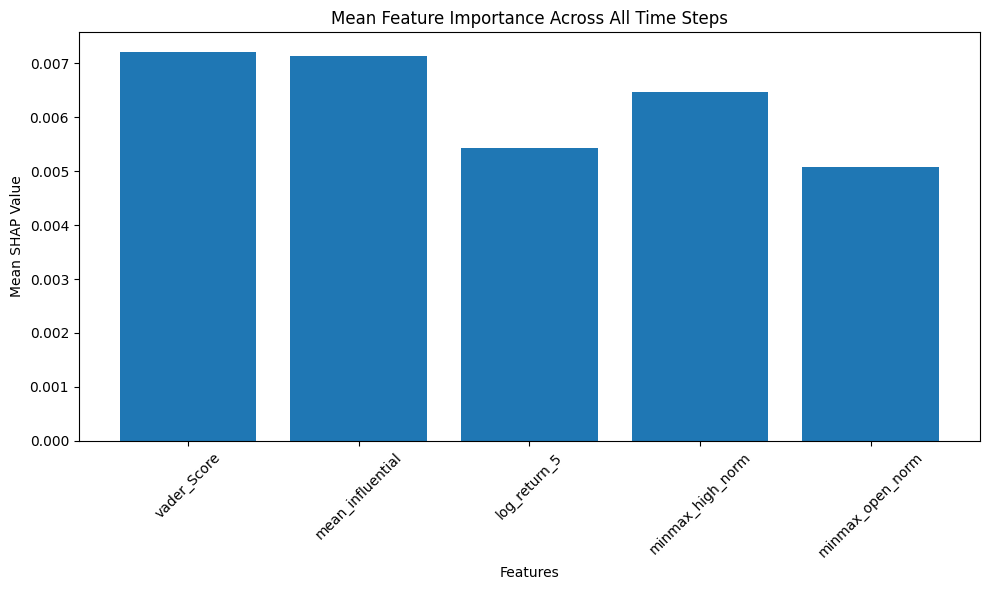

52


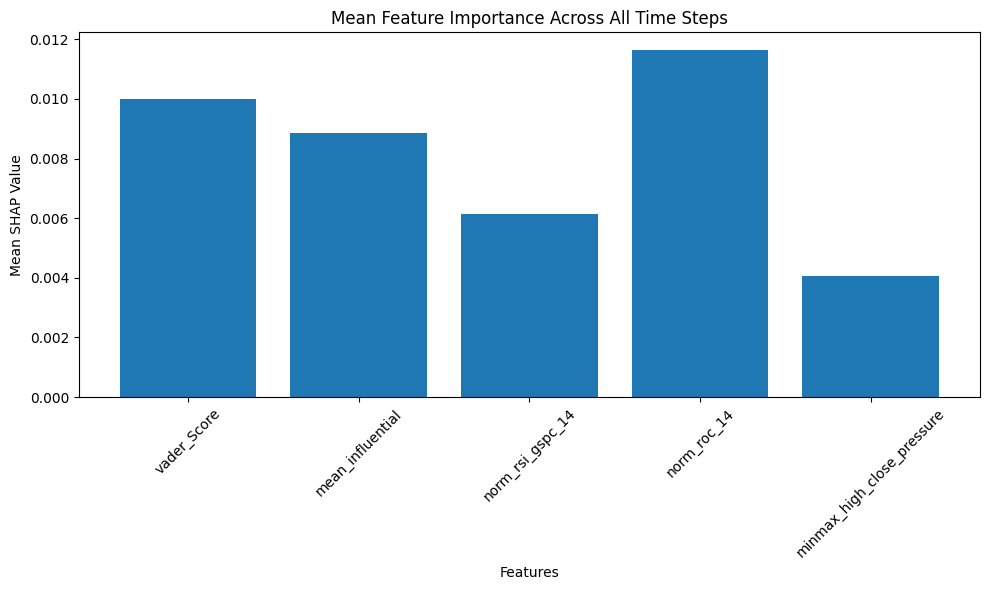

38


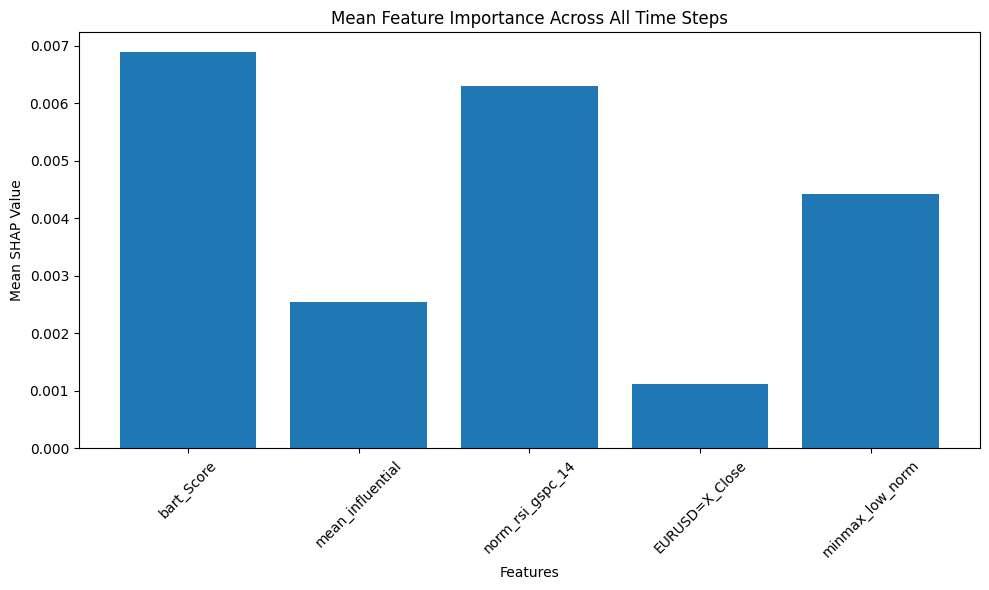

30


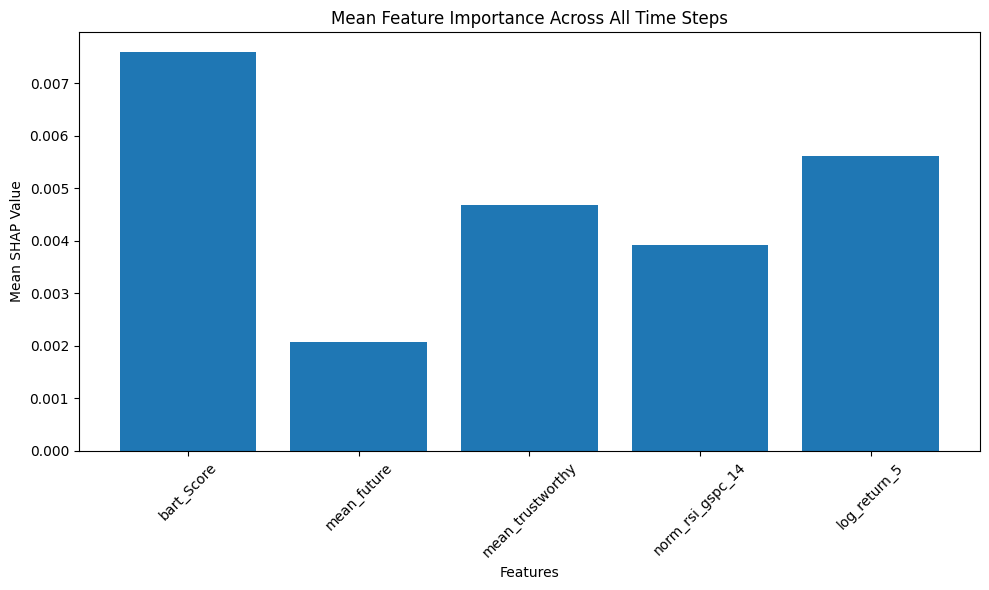

46


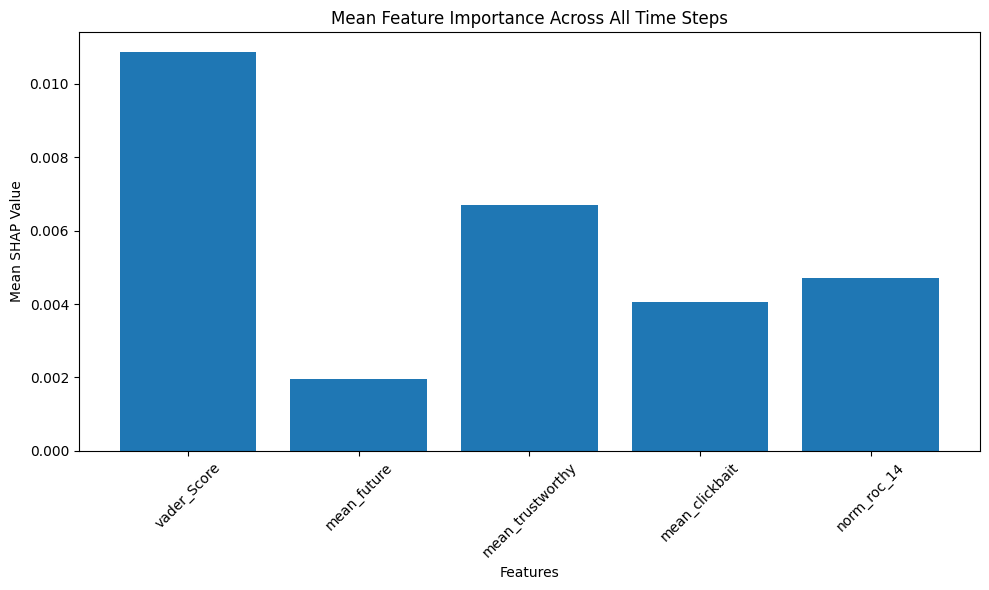

43


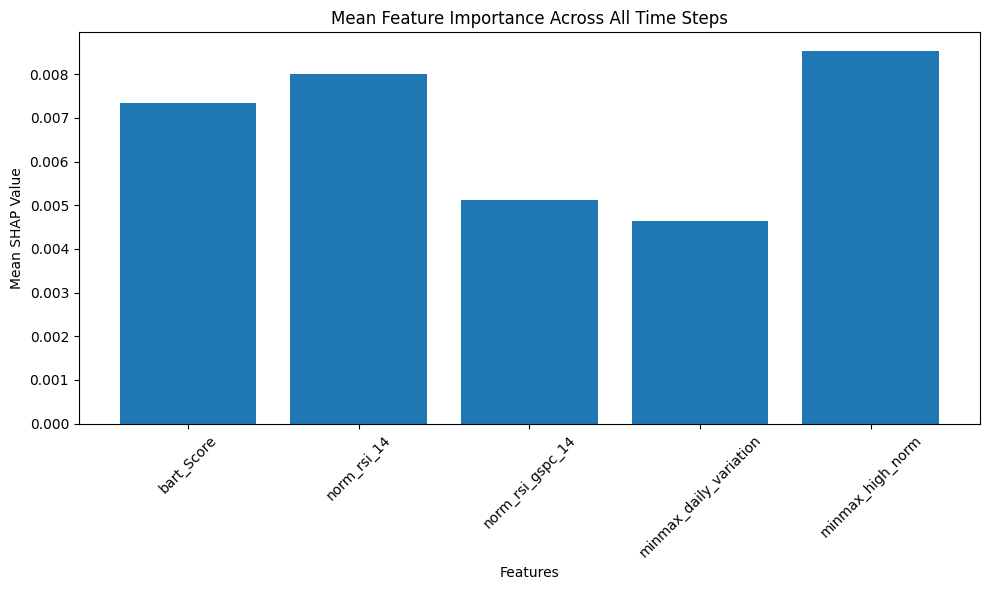

15


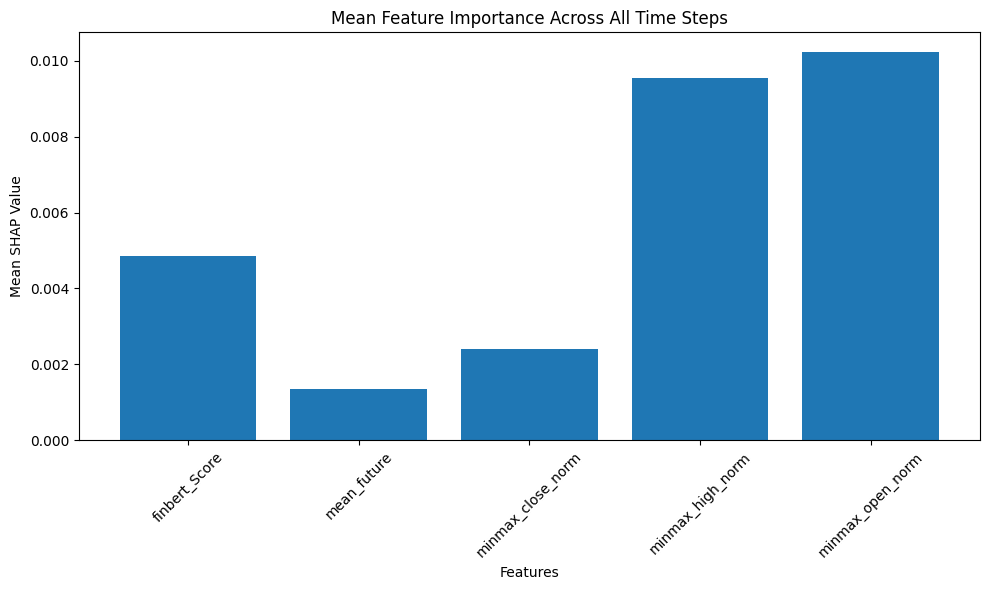

9


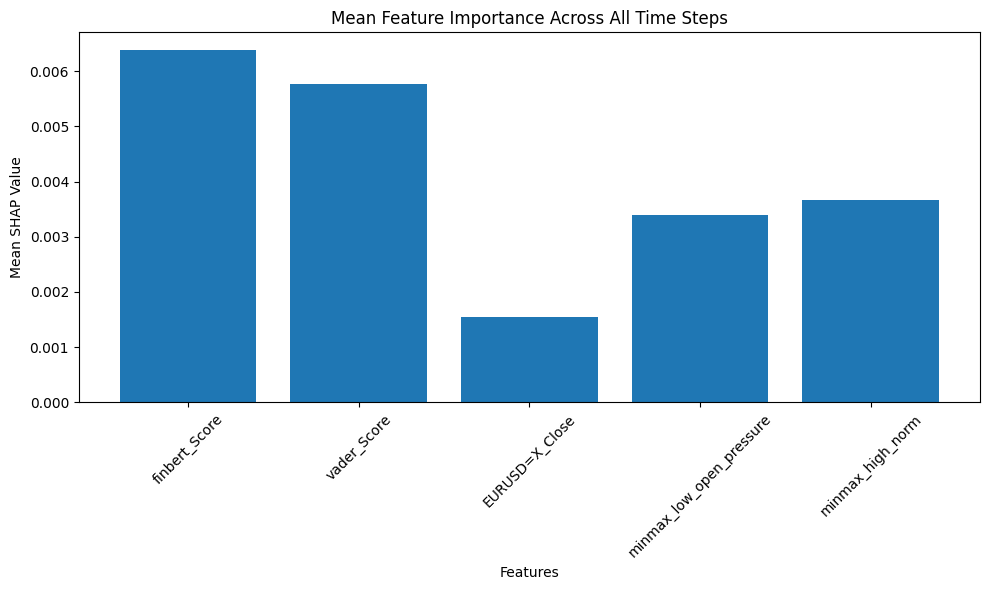

20


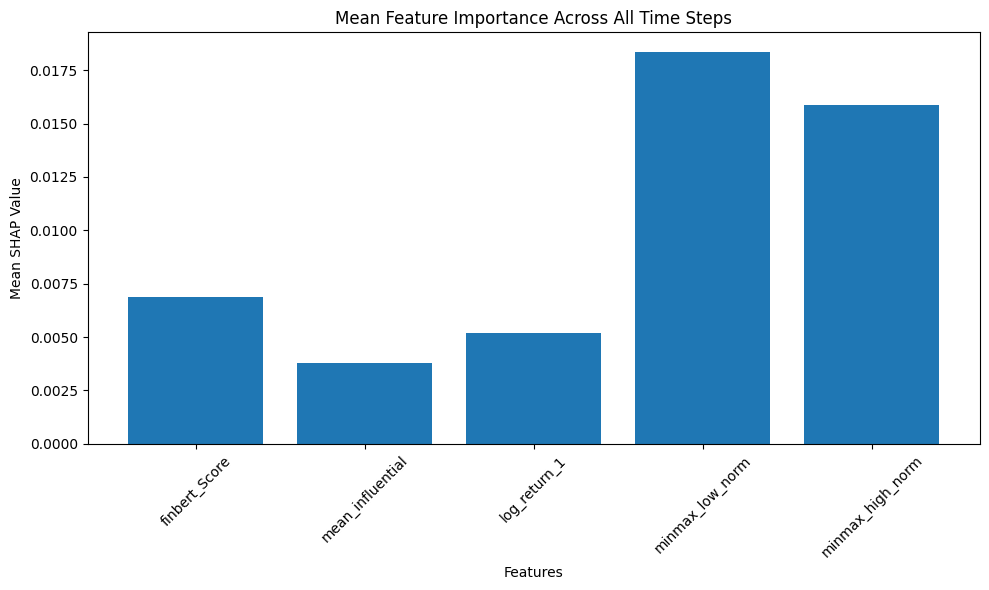

7


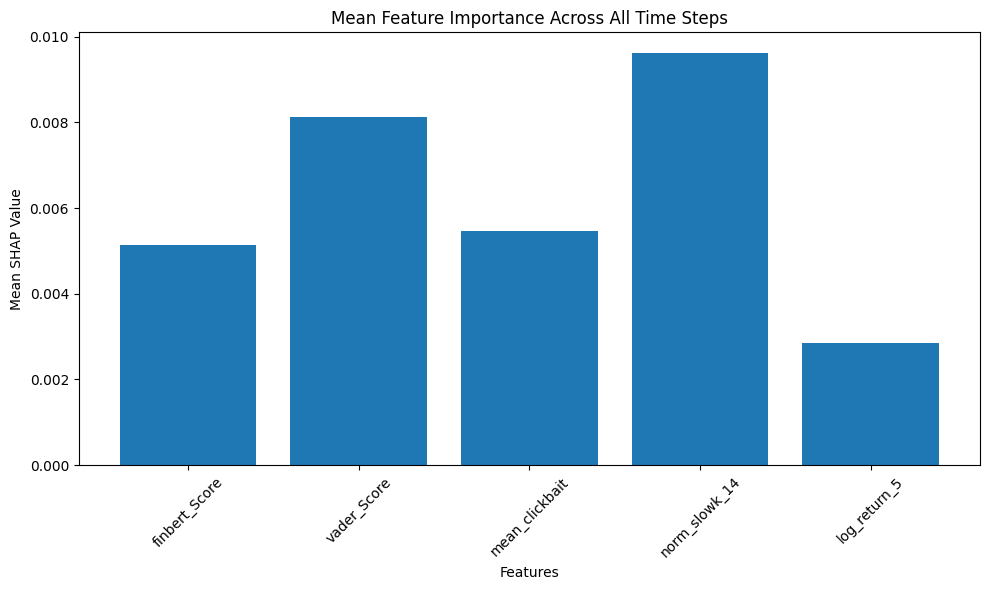

In [22]:
# Max po oknach czasowych
for index, row in top_10_df.iterrows():
    print(index)
    shap_values = row['aggregated_shap']
    feature_names = row['cols_used']
    plot_mean_feature_importance(shap_values, feature_names,True)

54


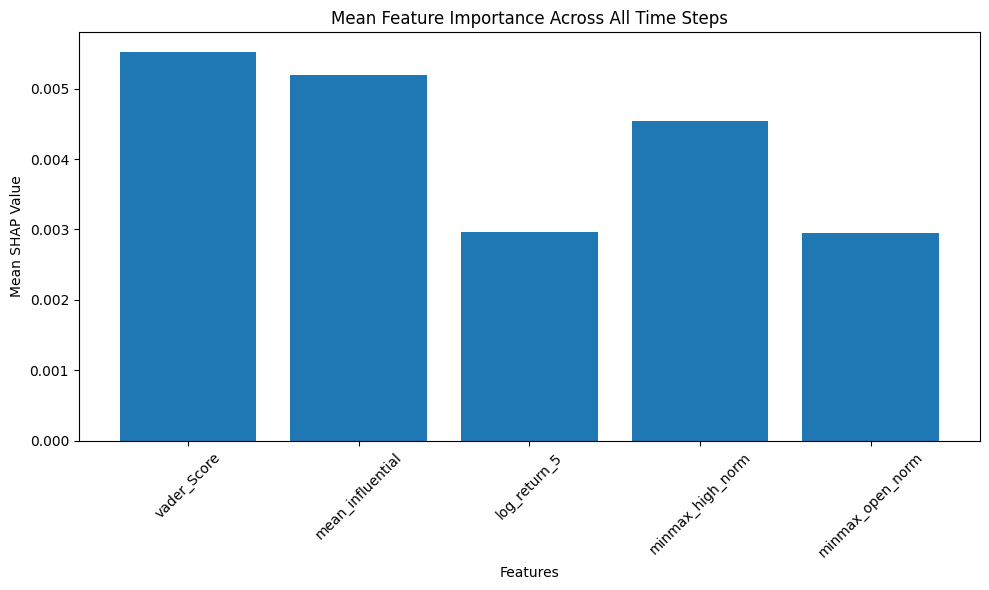

52


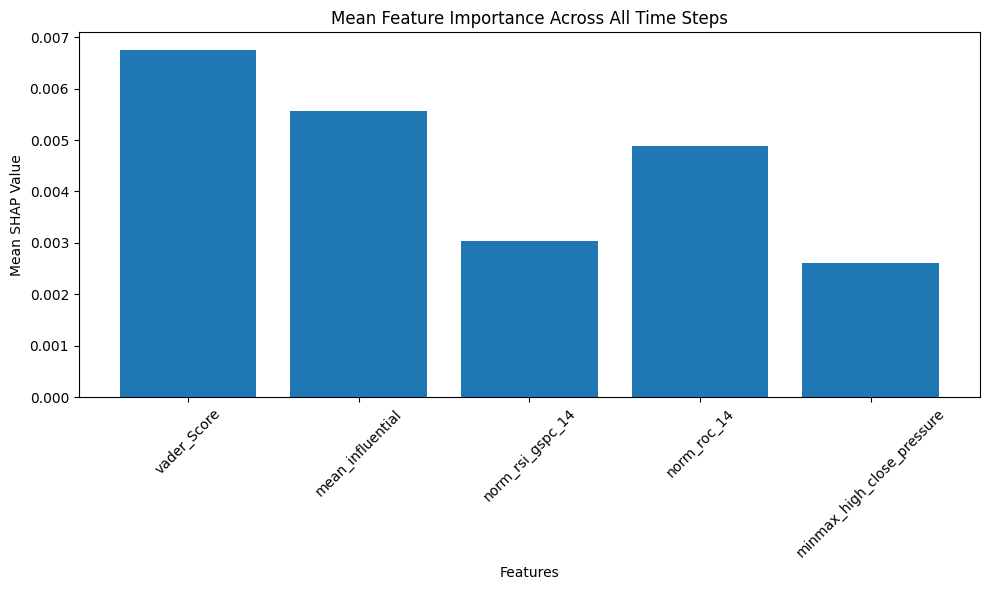

38


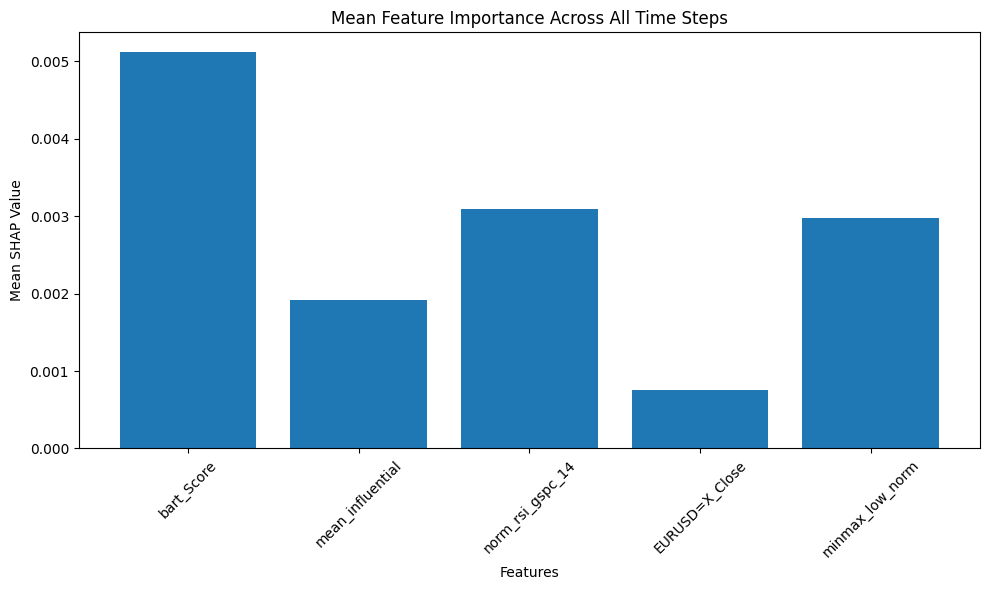

30


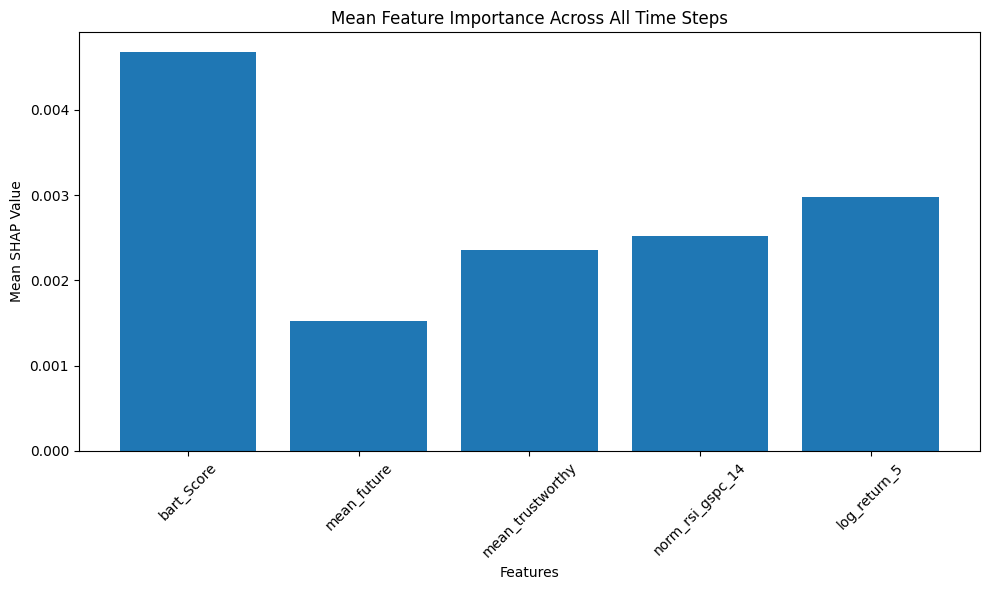

46


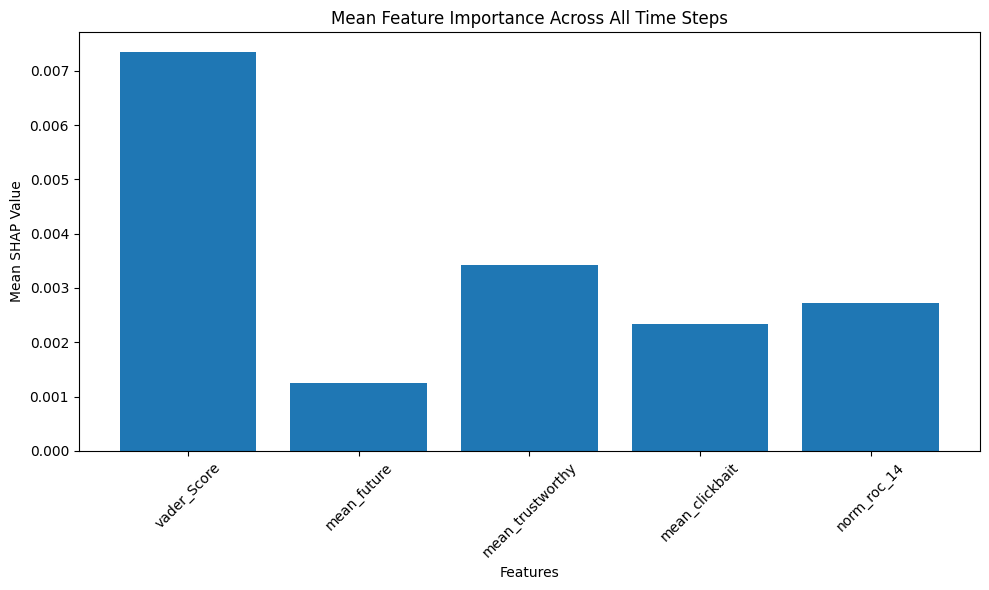

43


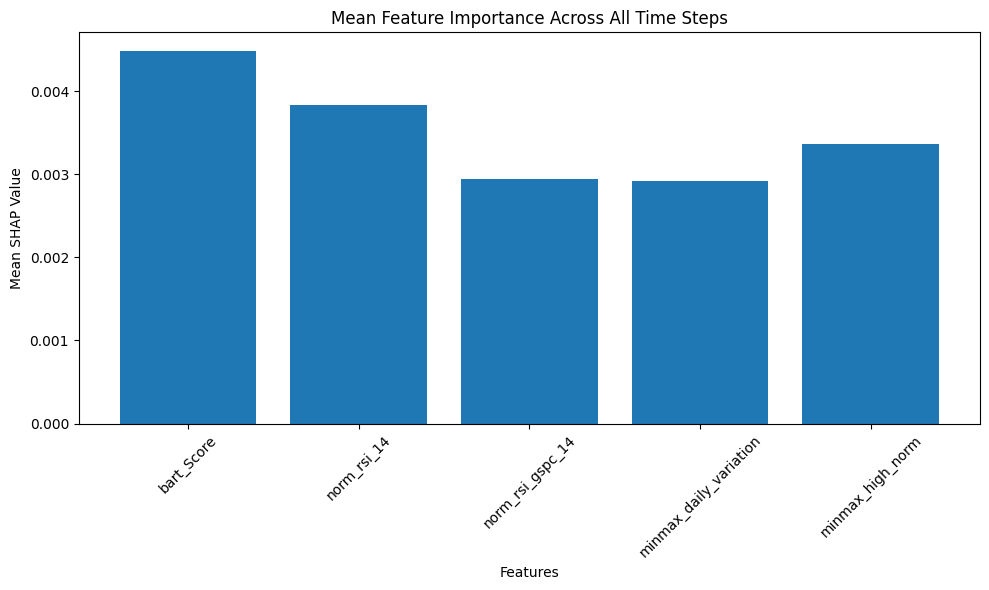

15


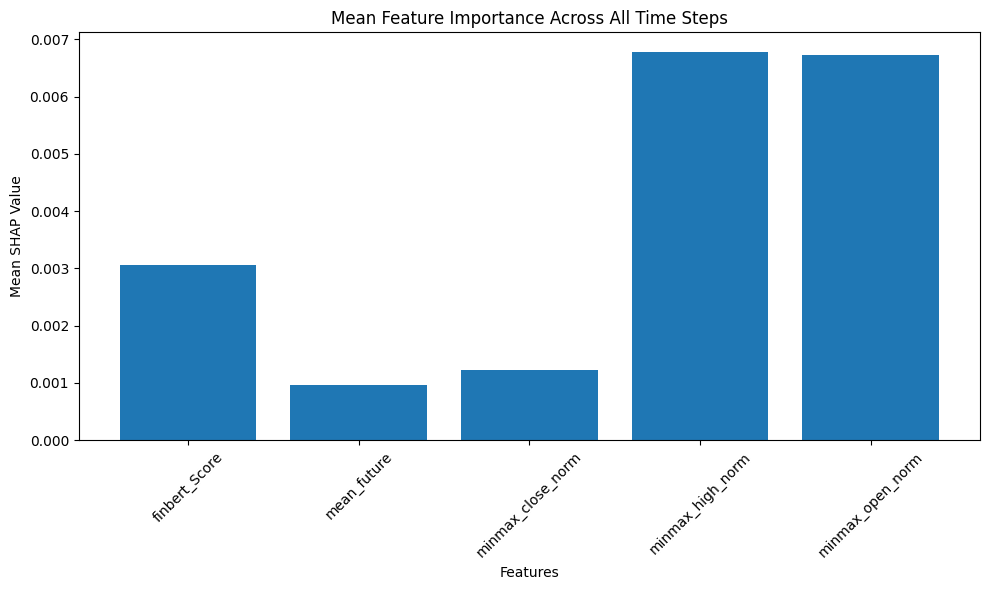

9


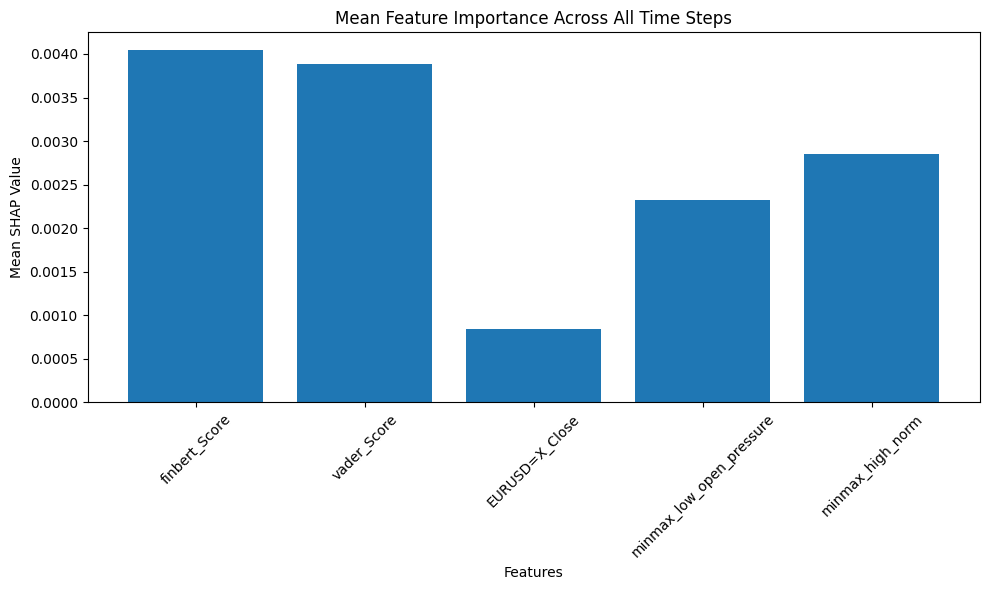

20


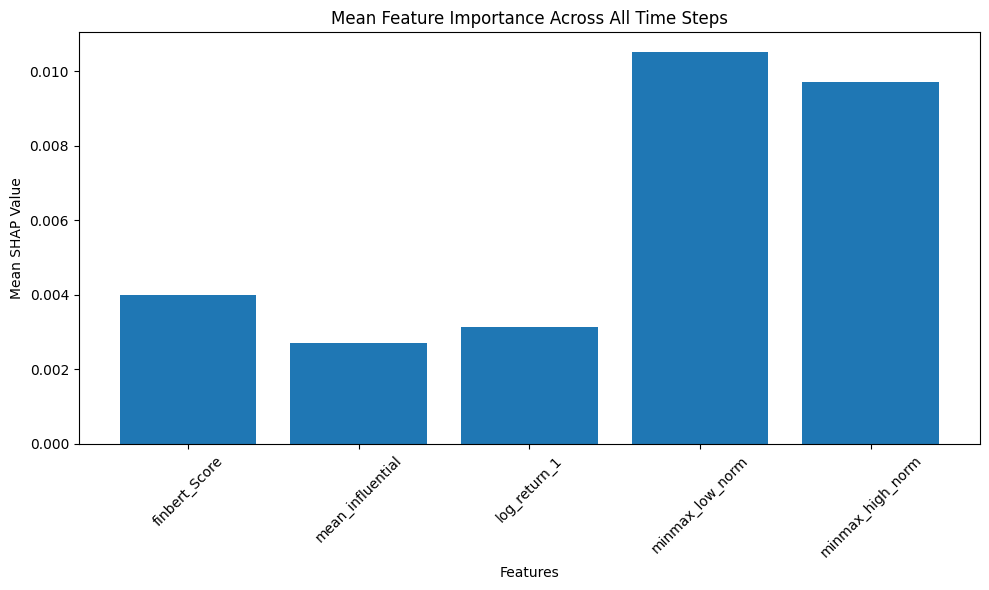

7


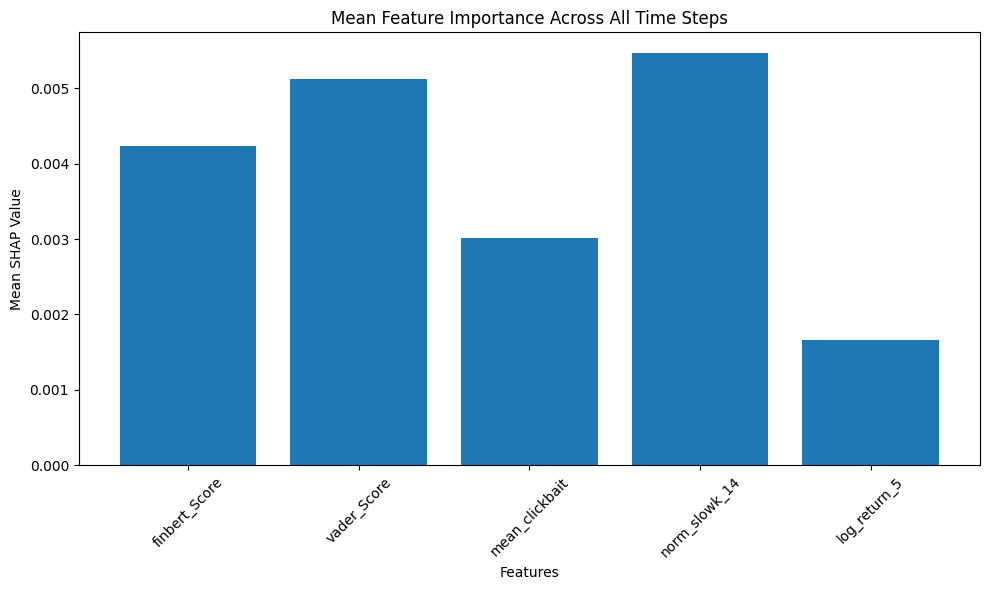

In [23]:
# Średnia po oknach czasowych
for index, row in top_10_df.iterrows():
    print(index)
    shap_values = row['aggregated_shap']
    feature_names = row['cols_used']
    plot_mean_feature_importance(shap_values, feature_names)

### Przykładowy model

In [ ]:
window_size = 10
target_cols = ['target_5']
cols_used = {'vader_Score',
 'mean_influential',
 'log_return_5',
 'minmax_high_norm',
 'minmax_open_norm'}
X,y = window_dataset(train_set[list(cols_used)+target_cols],  target_cols[0], window_size)
X_val, y_val = window_dataset(val_set[list(cols_used)+target_cols], target_cols[0], window_size)

model, history = make_model_better(X, y, X_val, y_val, n_epochs=200, lstm_units=32,
                              dense_units=8, patience=100)

#### Wyniki

In [30]:
y_pred_val = model.predict(X_val)
y_pred_train = model.predict(X)

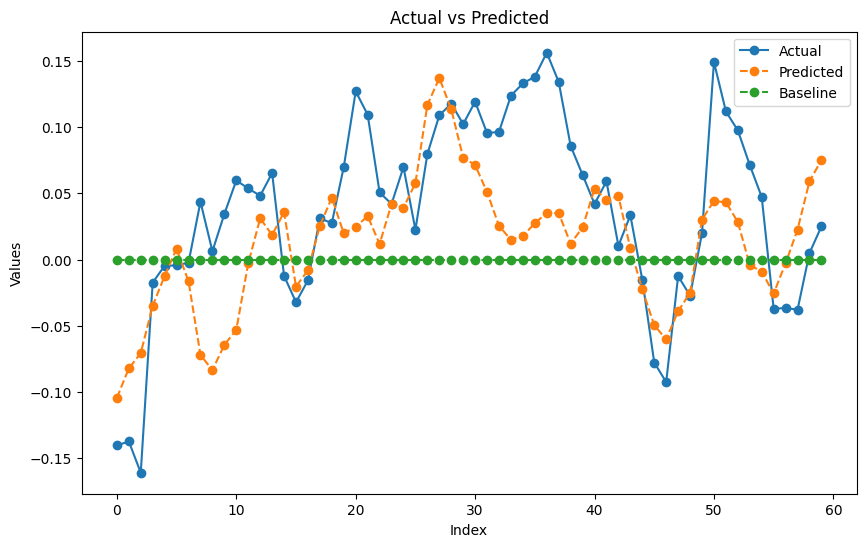

In [33]:
k=-60
plot_actual_vs_predicted(y[k:], y_pred_train[k:], y_base0_train[k:])

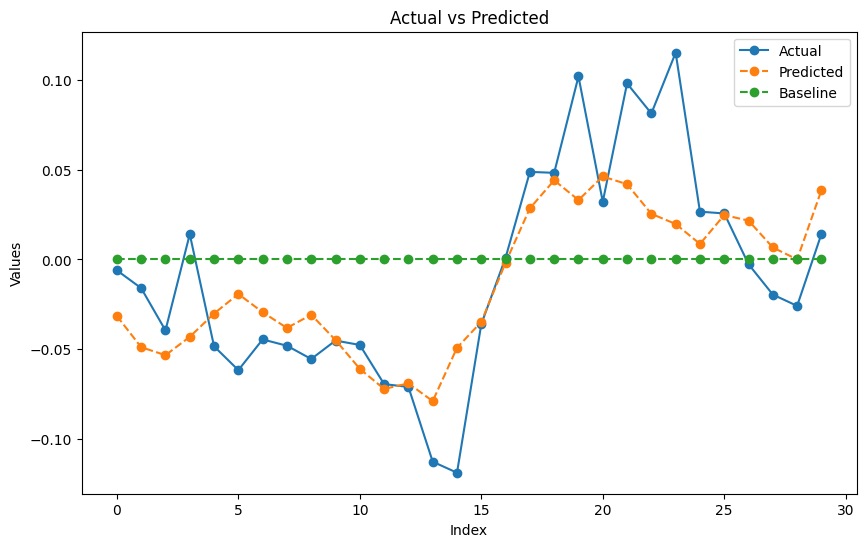

In [34]:
plot_actual_vs_predicted(y_val, y_pred_val, y_base0_val)

In [35]:
print('Model')
print(calculate_metrics(y, y_pred_train, np.array([1]), np.array([1]), y_val, y_pred_val))
print('-----')
print('Baseline 0')
print(calculate_metrics(y, y_base0_train, np.array([1]), np.array([1]), y_val, y_base0_val))
print('-----')
print('Baseline Prev')
print(calculate_metrics(y, y_base_train, np.array([1]), np.array([1]), y_val, y_base_val))


Model
                 MAE       MSE      RMSE  R2 Score        MAPE      MASE
Train       0.049933  0.003835  0.061928  0.445132  885.821355  1.237928
Test        0.000000  0.000000  0.000000       NaN    0.000000  0.000000
Validation  0.026633  0.001266  0.035576  0.633524  299.100987  0.660285
-----
Baseline 0
                 MAE       MSE      RMSE  R2 Score   MAPE      MASE
Train       0.064894  0.006912  0.083137 -0.000003  100.0  1.608834
Test        0.000000  0.000000  0.000000       NaN    0.0  0.000000
Validation  0.049144  0.003530  0.059411 -0.022058  100.0  1.218378
-----
Baseline Prev
                 MAE       MSE      RMSE  R2 Score        MAPE      MASE
Train       0.085557  0.011935  0.109245 -0.726724  783.969031  2.121111
Test        0.000000  0.000000  0.000000       NaN    0.000000  0.000000
Validation  0.065605  0.006689  0.081784 -0.936777  545.417382  1.626482


In [36]:
explainer = shap.DeepExplainer(model, X)
shap_values = explainer.shap_values(X_val)

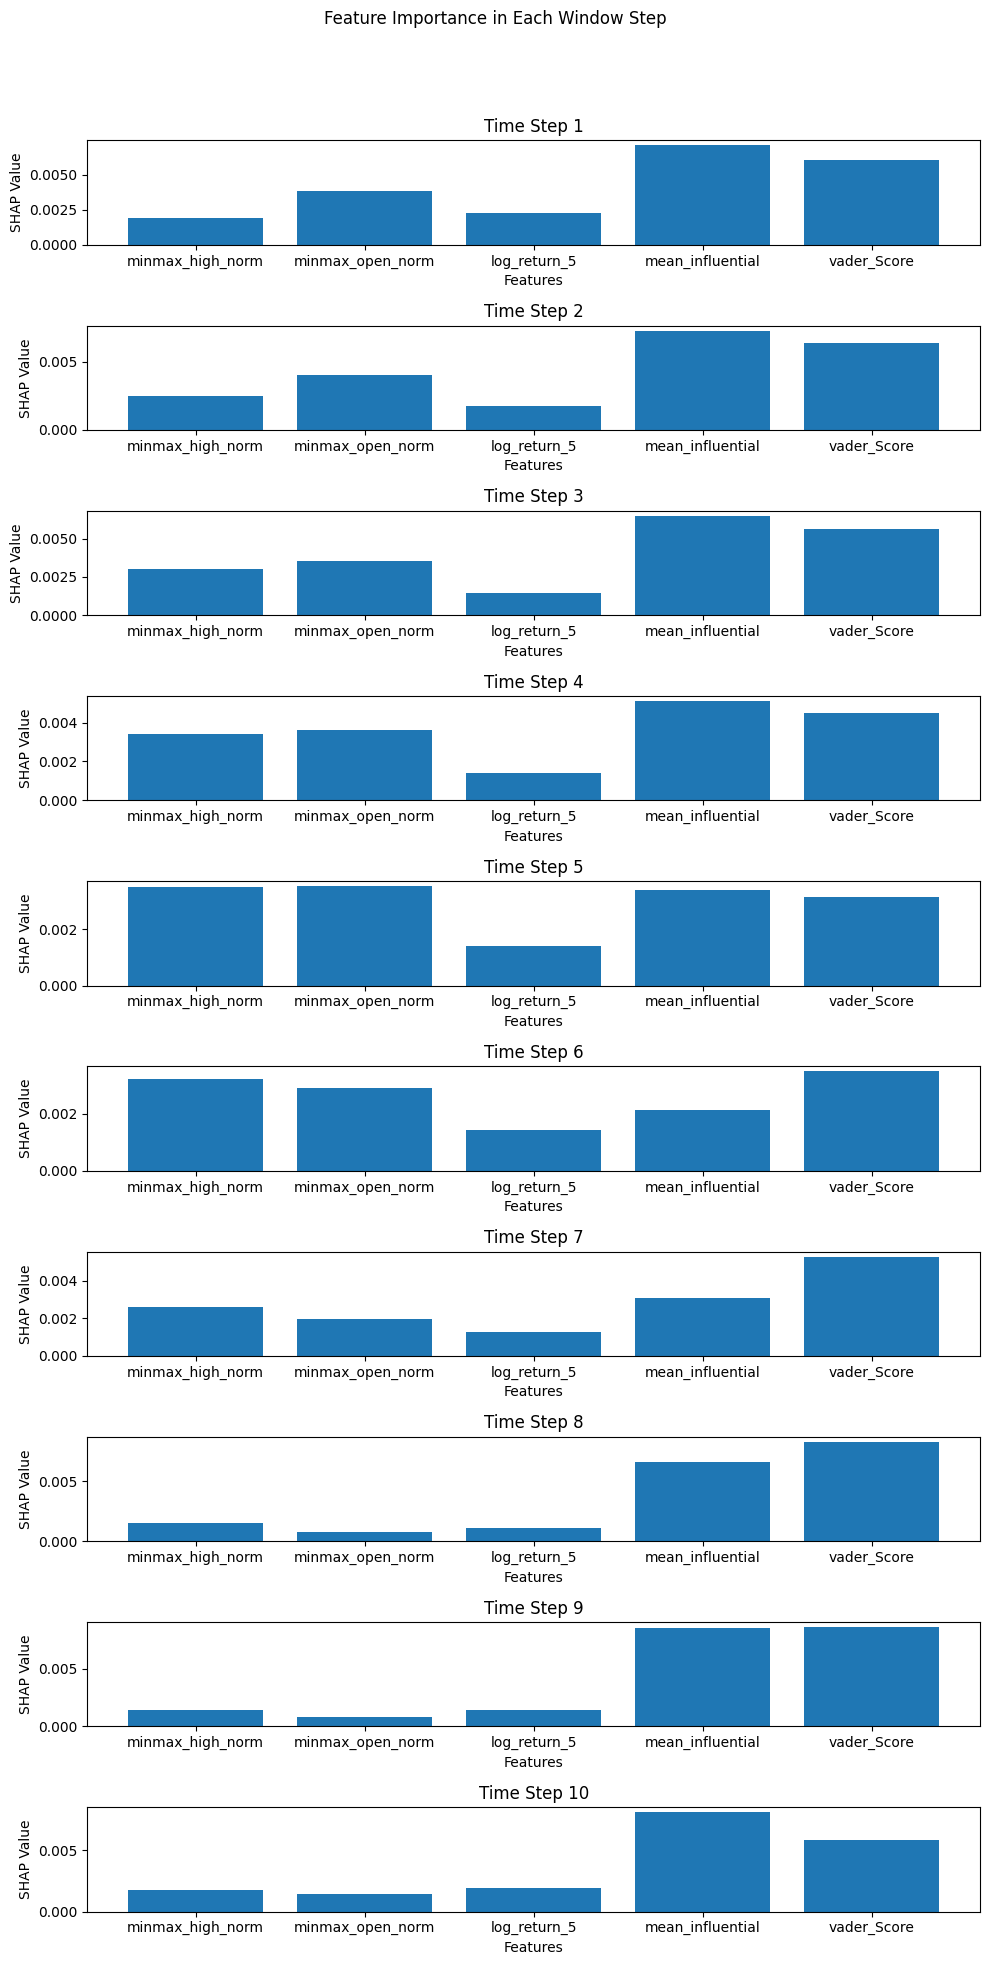

In [37]:
feature_names = list(cols_used)
plot_feature_importance(shap_values, feature_names,window_size)